# Homework 2 F19 (55 Points)

In this second workbook, I will keep examining Airbnb data in the Boston region to check price or availability information, something similar to http://insideairbnb.com/boston/

Download the following three files to run the codes below: listings_detail.csv, reviews_detail.csv, and calendar.csv. These files were obtained from http://insideairbnb.com/get-the-data.html


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns= None

# Part 1: Inspect data and create features

### 1. Read in listings_details.csv file and use the id column as index. Save the DataFrame as listings.

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3781,https://www.airbnb.com/rooms/3781,20181011131018,2018-10-11,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de...,NaN,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,NaN,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.365241,-71.029361,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$125.00,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,30,1125,2 months ago,t,0,6,6,52,2018-10-11,14,2015-07-10,2018-07-02,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,super_strict_30,f,f,2,0.35
5506,https://www.airbnb.com/rooms/5506,20181011131018,2018-10-11,**$125 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,NaN,NaN,https://a0.muscache.com/im/pictures/1598e8b6-5...,NaN,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,6,6,"['email', 'phone', 'reviews', 'kba']",t,t,"Boston, MA, United States",Roxbury,Roxbury,NaN,Boston,MA,02119,Boston,"Boston, MA",US,United States,42.329809,-71.095595,t,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air

In [2]:
listings=pd.read_csv('listings_detail.csv', index_col='id')
listings.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3781,https://www.airbnb.com/rooms/3781,20181011131018,2018-10-11,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de...,NaN,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,NaN,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.365241,-71.029361,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$125.00,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,30,1125,2 months ago,t,0,6,6,52,2018-10-11,14,2015-07-10,2018-07-02,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,super_strict_30,f,f,2,0.35
5506,https://www.airbnb.com/rooms/5506,20181011131018,2018-10-11,**$125 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,NaN,NaN,https://a0.muscache.com/im/pictures/1598e8b6-5...,NaN,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,6,6,"['email', 'phone', 'reviews', 'kba']",t,t,"Boston, MA, United States",Roxbury,Roxbury,NaN,Boston,MA,02119,Boston,"Boston, MA",US,United States,42.329809,-71.095595,t,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air

### 2. How many rows and columns  are in the dataset?

(6014, 95)

In [351]:
listings.shape

(6014, 95)

### 3. Remove the columns where all values are null.  Make sure to set the inplace parameter to true to make the change in effect. 

(6014, 88)

In [3]:
listings.dropna(axis=1, how='all', inplace=True)
listings.shape

(6014, 88)

### 4. As you see, it is worth dropping columns that includes url such as  listing_url, picture_url, host_url, host_thumbnail_url, host_picture_url. Delete those columns from the DataFrame.

,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3781,20181011131018,2018-10-11,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,f,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.365241,-71.029361,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$125.00,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,30,1125,2 months ago,t,0,6,6,52,2018-10-11,14,2015-07-10,2018-07-02,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,super_strict_30,f,f,2,0.35
5506,20181011131018,2018-10-11,**$125 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,f,Roxbury,6,6,"['email', 'phone', 'reviews', 'kba']",t,t,"Boston, MA, United States",Roxbury,Roxbury,Boston,MA,02119,Boston,"Boston, MA",US,United States,42.329809,-71.095595,t,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",225.0,$145.00,$980.00,"$3,000.00",$0.00,$40.00,1,$0.00,3,730,today,t,3,28,52,324,2018-10-11,75,2009-03-21,2018-10-09,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,t,f,strict_14_with_grace_period,f,f,6,0.64
6695,20181011131018,2018-10-11,$125 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",NaN,"We are a 5 minute walk to the subway, 5 minut...","Full Private apartment. 1 bedroom, kitchen, ...",NaN,No Smoking in the Building.,8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100

(6014, 83)

In [4]:
listings.drop(listings.filter(regex='url').columns, axis=1, inplace=True)
listings.head(3)

,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3781,20181011131018,2018-10-11,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,f,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.365241,-71.029361,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$125.00,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,30,1125,2 months ago,t,0,6,6,52,2018-10-11,14,2015-07-10,2018-07-02,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,super_strict_30,f,f,2,0.35
5506,20181011131018,2018-10-11,**$125 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,f,Roxbury,6,6,"['email', 'phone', 'reviews', 'kba']",t,t,"Boston, MA, United States",Roxbury,Roxbury,Boston,MA,02119,Boston,"Boston, MA",US,United States,42.329809,-71.095595,t,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",225.0,$145.00,$980.00,"$3,000.00",$0.00,$40.00,1,$0.00,3,730,today,t,3,28,52,324,2018-10-11,75,2009-03-21,2018-10-09,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,t,f,strict_14_with_grace_period,f,f,6,0.64
6695,20181011131018,2018-10-11,$125 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",NaN,"We are a 5 minute walk to the subway, 5 minut...","Full Private apartment. 1 bedroom, kitchen, ...",NaN,No Smoking in the Building.,8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100

In [5]:
listings.shape

(6014, 83)

### 5. The number of listings for each property type. 

Apartment             3960
House                  908
Condominium            561
Serviced apartment     147
Townhouse              141
Name: property_type, dtype: int64

In [252]:
list_proptypes=listings['property_type'].value_counts()
list_proptypes.head()

Apartment             3960
House                  908
Condominium            561
Serviced apartment     147
Townhouse              141
Name: property_type, dtype: int64

### 6. The percentage of each property type

In [253]:
listings['property_type'].value_counts(normalize=True)*100

Apartment             65.846358
House                 15.098104
Condominium            9.328234
Serviced apartment     2.444297
Townhouse              2.344529
Guest suite            1.197207
Other                  1.180579
Loft                   0.864649
Bed and breakfast      0.648487
Boutique hotel         0.249418
Boat                   0.216162
Villa                  0.149651
Guesthouse             0.116395
Hotel                  0.099767
Bungalow               0.083139
Resort                 0.033256
Tiny house             0.033256
Cottage                0.016628
Chalet                 0.016628
Bus                    0.016628
Hostel                 0.016628
Name: property_type, dtype: float64

Apartment             65.846358
House                 15.098104
Condominium            9.328234
Serviced apartment     2.444297
Townhouse              2.344529
Guest suite            1.197207
Other                  1.180579
Loft                   0.864649
Bed and breakfast      0.648487
Boutique hotel         0.249418
Boat                   0.216162
Villa                  0.149651
Guesthouse             0.116395
Hotel                  0.099767
Bungalow               0.083139
Resort                 0.033256
Tiny house             0.033256
Chalet                 0.016628
Hostel                 0.016628
Bus                    0.016628
Cottage                0.016628
Name: property_type, dtype: float64

### 7. What is the percentage of high available property?  High availability is defined as a property available more than 60 days per year. Use the 'availability_365' column. 

In [254]:
filt=listings['availability_365'] > 60
High=listings[filt]

len(High)/len(listings)


0.6333555038244097

0.6333555038244097

### 8. What is the average price for all the listings?   Note that you should convert to a numeric type

In [344]:
remove_symbols=listings['price'].str.replace('$','').str.replace(',','')
float_type=remove_symbols.astype('float64')
listings.price=float_type

listings.price.mean()

184.02061855670104

184.02061855670104

###  9. Find only apartments, houses, and condominiums.  What is the average price of those properties?

In [257]:
filt_apartment = listings['property_type'] == "Apartment" 
filt_house=listings['property_type'] == "House"
filt_condo=listings['property_type'] == "Condominium"
total_filt=listings[filt_apartment | filt_house | filt_condo]
total_filt.price.mean()

181.74341499355313

181.74341499355313

### 10. Create a box plot of price per room type. 

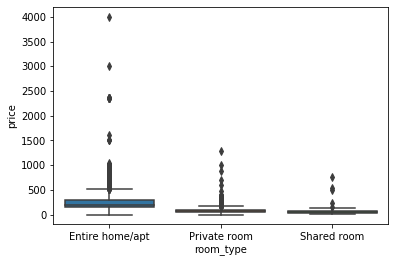

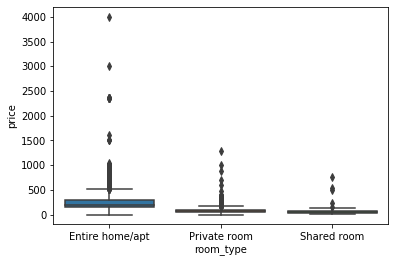

In [258]:
sns.boxplot( y='price', x='room_type', data=listings)

### 11. Create a plot of the number of reviews.

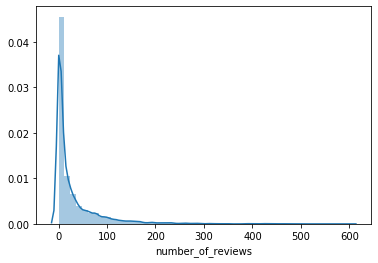

In [259]:
sns.distplot( listings['number_of_reviews'])

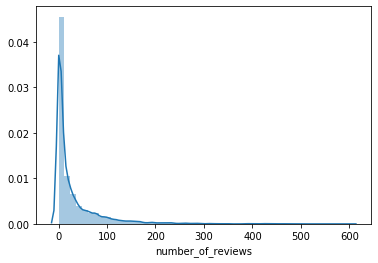

### 12. You are interested in whether superhosts receive more reviews. Thus, create a box plot that shows the relationship between superhost and the number of reviews.

### Use the 'host_is_superhost' and 'number_of_reviews' columns.

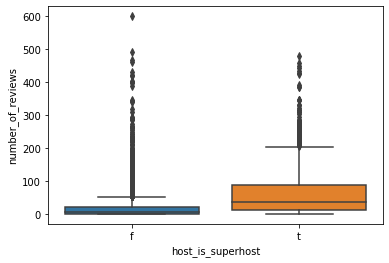

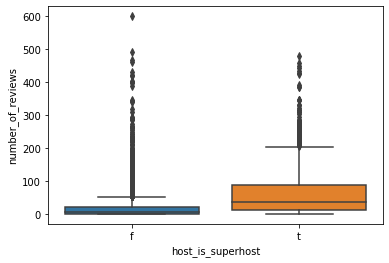

In [260]:
sns.boxplot( x='host_is_superhost', y='number_of_reviews', data=listings)

### 13. Create a lmplot between price and cleaning_fee. 

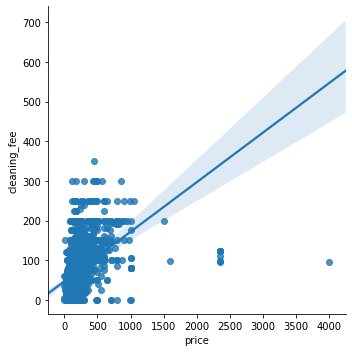

In [261]:
remove_symbols2=listings['cleaning_fee'].str.replace('$','').str.replace(',','')
float_type=remove_symbols2.astype('float64')
listings.cleaning_fee=float_type
sns.lmplot(x='price', y='cleaning_fee', data=listings);

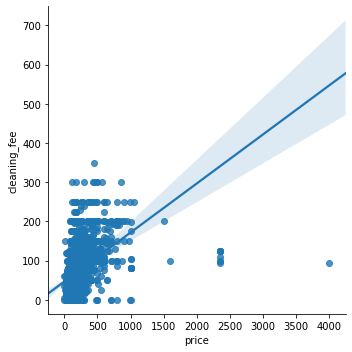

### 14. Split the previous plot with the hue paramter, 'host_is_superhost'.

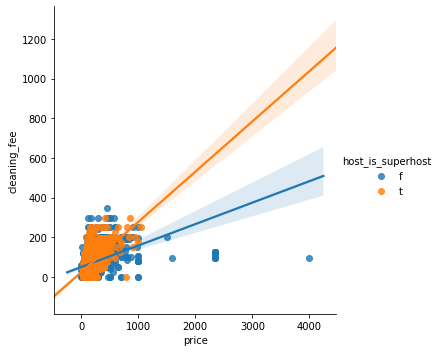

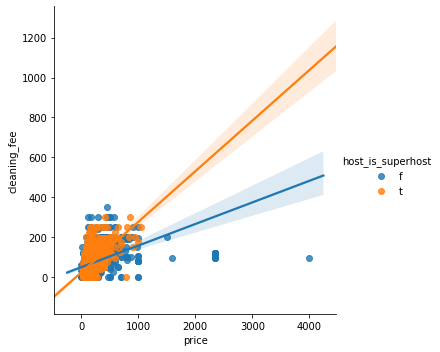

In [262]:
sns.lmplot(x='price', y='cleaning_fee', hue='host_is_superhost', data=listings);

### 15. Find listings near downtown? That is, the name column should contain "downtown"

,name,property_type,price
id,,,
753446,6 miles away from downtown Boston!,Condominium,50.0
1214214,Breathtaking downtown arty condo,Apartment,450.0
3457722,Sunlit with easy access downtown!,House,260.0
3945704,"Super quiet, minutes from downtown!",Apartment,85.0
5967936,Apt close to downtown and backbay,Apartment,175.0
6914155,Spacious bedroom close to downtown,Apartment,59.0
10034183,Spacious 1br/2bath near beach/convention/downtown,Condominium,150.0
10811129,Lovely 1BD in downtown/theater dis.,Apartment,80.0
11625336,One stop from downtown Boston!,House,350.0


In [263]:
listings['name']=listings['name'].astype('str')

In [264]:
def downtown_name(x):
    if 'downtown' in x :
        return True
    else:
        return False

In [265]:
downtown=listings[listings['name'].apply(downtown_name)]
downtown[['name','property_type','price']].head(10)

,name,property_type,price
id,,,
753446,6 miles away from downtown Boston!,Condominium,50.0
1214214,Breathtaking downtown arty condo,Apartment,450.0
3457722,Sunlit with easy access downtown!,House,260.0
3945704,"Super quiet, minutes from downtown!",Apartment,85.0
5967936,Apt close to downtown and backbay,Apartment,175.0
6914155,Spacious bedroom close to downtown,Apartment,59.0
10034183,Spacious 1br/2bath near beach/convention/downtown,Condominium,150.0
10811129,Lovely 1BD in downtown/theater dis.,Apartment,80.0
11625336,One stop from downtown Boston!,House,350.0


### 16.  Among those downtown places in the previous question, find affordable listings. That is, its price should be below the average price of the downtown places.

,name,property_type,price
id,,,
753446,6 miles away from downtown Boston!,Condominium,50.0
3945704,"Super quiet, minutes from downtown!",Apartment,85.0
6914155,Spacious bedroom close to downtown,Apartment,59.0
10034183,Spacious 1br/2bath near beach/convention/downtown,Condominium,150.0
10811129,Lovely 1BD in downtown/theater dis.,Apartment,80.0
12372052,3 min to subway T stop-Orange Line-10 min down...,Apartment,150.0
12916551,*New2BEDS*free parking /Boston downtown,Apartment,59.0
13076586,Room in the heart of downtown Boston,Apartment,56.0
13830152,Room in a house 3 min to T stop-10 min to down...,Apartment,80.0


In [266]:
filt= downtown['price'] < (downtown['price'].mean())
downtown[filt][['name','property_type','price']].head(10).head(10)

,name,property_type,price
id,,,
753446,6 miles away from downtown Boston!,Condominium,50.0
3945704,"Super quiet, minutes from downtown!",Apartment,85.0
6914155,Spacious bedroom close to downtown,Apartment,59.0
10034183,Spacious 1br/2bath near beach/convention/downtown,Condominium,150.0
10811129,Lovely 1BD in downtown/theater dis.,Apartment,80.0
12372052,3 min to subway T stop-Orange Line-10 min down...,Apartment,150.0
12916551,*New2BEDS*free parking /Boston downtown,Apartment,59.0
13076586,Room in the heart of downtown Boston,Apartment,56.0
13830152,Room in a house 3 min to T stop-10 min to down...,Apartment,80.0


### 17. Examine the 'first_review' and 'last_review' columns. What are the average days between the first review and the last review? 

Timedelta('475 days 03:57:14.754098')

In [267]:
listings[['first_review','last_review']].head()

,first_review,last_review
id,,
3781,2015-07-10,2018-07-02
5506,2009-03-21,2018-10-09
6695,2009-08-06,2018-09-23
6976,2009-07-19,2018-09-16
8789,2014-08-12,2018-09-12


In [268]:
start=pd.to_datetime(listings['first_review'])
stop=pd.to_datetime(listings['last_review'])
(stop-start).mean()

Timedelta('475 days 03:57:14.754098')

### 18. Examine the 'first_review' and 'last_review' columns. Which listing has the longest period? 



,name,first_review,last_review
id,,,
5506,**$125 Special ** Private! Minutes to center!,2009-03-21,2018-10-09


In [269]:
(stop-start).nlargest(1)


id
5506   3489 days
dtype: timedelta64[ns]

In [270]:
longest= ((stop-start) == '3489 days')
listings[longest][['name','first_review','last_review']]

,name,first_review,last_review
id,,,
5506,**$125 Special ** Private! Minutes to center!,2009-03-21,2018-10-09


###  House_rules lay out rules and policies for properties, and you are interested in whether such rules as pet allowed influence price. Thus, you will create new binary columns that reflect the rules.

### Before creating new columns, you must take care of null values in the house_rules column. Otherwise,  you will have an error because pandas doesn't know how to apply the functions to null values.  

### 19. How many null values are in the house_rules column?

2021

In [355]:
listings['house_rules'].isnull().sum()

2021

### 20. Fill the null values with "".

0

In [356]:
listings['house_rules'].fillna(value='', inplace=True)

In [357]:
listings['house_rules'].isnull().sum()

0

###  21. Create a new column named  house_rules_no_smoking by checking whether smoking is prohibited by the house rules. The column will display 1 if 'no smoking' or 'smoking is not allowed' is in the house_rules column. Otherwise, it will show 0.  

### It must handle both uppercase and lowercase. 

,house_rules,house_rules_no_smoking
id,,
3781,"No pets, no smoking.",1
5506,No Smoking in the Building.,1
6695,No Smoking in the Building.,1
6976,I require my guests to have a verified email a...,1
8789,,0
8792,$1000 refundable security deposit and $150 cle...,1
9273,"No smoking, no pets. Security deposit required...",1
9824,--Renters must be 21 years or older. --No Smok...,1
9857,,0


In [275]:
def smoking(table):
    if ('no smoking' in table.lower() ) or ( 'smoking is not allowed' in table.lower() ) :
        return 1
    else:
        return 0

In [276]:
listings['house_rules_no_smoking']=listings['house_rules'].apply(smoking)
listings[['house_rules','house_rules_no_smoking']].head(10)

,house_rules,house_rules_no_smoking
id,,
3781,"No pets, no smoking.",1
5506,No Smoking in the Building.,1
6695,No Smoking in the Building.,1
6976,I require my guests to have a verified email a...,1
8789,,0
8792,$1000 refundable security deposit and $150 cle...,1
9273,"No smoking, no pets. Security deposit required...",1
9824,--Renters must be 21 years or older. --No Smok...,1
9857,,0


### 22. Create a new column named house_rules_no_pets. The column will display 1 if 'no pets' or 'no smoking or pets' is in the house_rules column. Otherwise, it will show 0. Be sure to handle both uppercase and lowercase.

In [277]:
def pets(table):
    if ('no pets' in table.lower() ) or ( 'no smoking or pets' in table.lower() ) :
        return 1
    else:
        return 0

In [278]:
listings['house_rules_no_pets']=listings['house_rules'].apply(pets)
listings[['house_rules','house_rules_no_smoking','house_rules_no_pets']].head(20)

,house_rules,house_rules_no_smoking,house_rules_no_pets
id,,,
3781,"No pets, no smoking.",1,1
5506,No Smoking in the Building.,1,0
6695,No Smoking in the Building.,1,0
6976,I require my guests to have a verified email a...,1,0
8789,,0,0
8792,$1000 refundable security deposit and $150 cle...,1,1
9273,"No smoking, no pets. Security deposit required...",1,1
9824,--Renters must be 21 years or older. --No Smok...,1,0
9857,,0,0


,house_rules,house_rules_no_smoking,house_rules_no_pets
id,,,
3781,"No pets, no smoking.",1,1
5506,No Smoking in the Building.,1,0
6695,No Smoking in the Building.,1,0
6976,I require my guests to have a verified email a...,1,0
8789,,0,0
8792,$1000 refundable security deposit and $150 cle...,1,1
9273,"No smoking, no pets. Security deposit required...",1,1
9824,--Renters must be 21 years or older. --No Smok...,1,0
9857,,0,0


### 23. You want to examine whether amenities are related to price. For that, create a new feature column called 'Is_Wifi' that shows 1 if Wifi is in the amenities column. Otherwise, the column should display 0. 

In [279]:
 def wifi(table):
    if 'wifi' in table.lower() :
        return 1
    else:
        return 0

In [280]:
listings['Is_Wifi']=listings['amenities'].apply(wifi)
listings[['amenities','Is_Wifi']].head(20)

,amenities,Is_Wifi
id,,
3781,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",1
5506,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1
6695,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1
6976,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",1
8789,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1
8792,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1
9273,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1
9824,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1
9857,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1


,amenities,is_Wifi
id,,
3781,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",1
5506,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1
6695,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1
6976,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",1
8789,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1
8792,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1
9273,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1
9824,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1
9857,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1


### 24. Create a new column called 'amenities_number" by counting the number of different amenities in the amenities column. 

In [6]:
data = listings['amenities']

In [14]:
def count(data):
    for i in data:
        data.split(',')
    return len(data.split(','))

In [15]:
listings['amenities_number']= listings['amenities'].apply(count)

In [16]:
listings[['amenities','amenities_number']].head(20)

,amenities,amenities_number
id,,
3781,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",31
5506,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",33
6695,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",25
6976,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",24
8789,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",29
8792,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",33
9273,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",18
9824,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",30
9857,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",38


In [ ]:
listings['amenities_number']= listings['amenities'].str.count(',') + 1
listings[['amenities','amenities_number']].head(20)

,amenities,amenities_number
id,,
3781,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",31
5506,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",33
6695,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",25
6976,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",24
8789,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",29
8792,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",33
9273,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",18
9824,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",30
9857,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",38


### 25. Create a new column named ease_of_cancellation_policy by checking the severity of cancellation in the cancellation_policy column 3 being the highest score and 1 being the lowest score.

### The column will display 1 if 'flexible' , 2 if 'moderate',otherwise 3 if it is strict. It must handle both uppercase and lowercase.

In [281]:
def policy(table):
    if 'flexible' in table.lower():
        return 1
    elif 'moderate' in table.lower():
        return 2
    else:
        return 3

In [282]:
listings['ease_of_cancellation_policy']=listings['cancellation_policy'].apply(policy)
listings[['cancellation_policy','ease_of_cancellation_policy']].head(15)

,cancellation_policy,ease_of_cancellation_policy
id,,
3781,super_strict_30,3
5506,strict_14_with_grace_period,3
6695,strict_14_with_grace_period,3
6976,moderate,2
8789,strict_14_with_grace_period,3
8792,strict_14_with_grace_period,3
9273,super_strict_30,3
9824,super_strict_30,3
9857,super_strict_30,3


,cancellation_policy,ease_of_cancellation_policy
id,,
3781,super_strict_30,3
5506,strict_14_with_grace_period,3
6695,strict_14_with_grace_period,3
6976,moderate,2
8789,strict_14_with_grace_period,3
8792,strict_14_with_grace_period,3
9273,super_strict_30,3
9824,super_strict_30,3
9857,super_strict_30,3


# Part 2: Aggregate and summarize data

### 26. Calculate  the average price for each property type. Then, sort the data to list the property type with the highest average price first.

In [283]:
avg_price=listings.groupby('property_type').agg({'price':'mean'})
avg_price.sort_values('price',ascending=False).head(20)

,price
property_type,
Tiny house,375.000000
Boat,334.769231
Resort,297.500000
Serviced apartment,273.374150
Other,243.676056
Apartment,196.488384
Townhouse,192.397163
Loft,188.711538
Hotel,179.333333


### 27. The average price for  every neighbourhood  and property type

In [284]:
listings.groupby(['neighbourhood','property_type']).agg({'price':'mean'}).head(20)

price
neighbourhood    property_type                 
Allston-Brighton Apartment           141.992941
                 Chalet               54.000000
                 Condominium         164.464286
                 Guest suite         130.666667
                 Guesthouse          119.000000
                 Hotel                69.000000
                 House                96.276596
                 Loft                195.000000
                 Other               178.333333
                 Serviced apartment   88.888889
                 Townhouse           144.900000
                 Villa                55.000000
Back Bay         Apartment           246.794749
                 Bed and breakfast    99.000000
                 Boutique hotel      149.000000
                 Condominium         235.394737
                 Guest suite         135.000000
                 House               250.600000
                 Loft                153.250000
                 Serviced apartment  272.785714

price
neighbourhood    property_type                 
Allston-Brighton Apartment           141.992941
                 Chalet               54.000000
                 Condominium         164.464286
                 Guest suite         130.666667
                 Guesthouse          119.000000
                 Hotel                69.000000
                 House                96.276596
                 Loft                195.000000
                 Other               178.333333
                 Serviced apartment   88.888889
                 Townhouse           144.900000
                 Villa                55.000000
Back Bay         Apartment           246.794749
                 Bed and breakfast    99.000000
                 Boutique hotel      149.000000
                 Condominium         235.394737
                 Guest suite         135.000000
                 House               250.600000
                 Loft                153.250000
                 Serviced apartment  272.785714

### 28. For for  every neighbourhood and property type, find the total number of listings, the average, minimum, and maximum number of  accommodates, and average and standard deviation of price. Use the 'neighbourhood' column.

In [285]:
Set_1=listings.groupby(['neighbourhood','property_type']).agg({'accommodates':['mean','min','max','size'],'price':['mean','std']})


In [286]:
Set_1.head(20)

accommodates                    price  \
                                            mean min max size        mean   
neighbourhood    property_type                                              
Allston-Brighton Apartment              2.962353   1  12  425  141.992941   
                 Chalet                 1.000000   1   1    1   54.000000   
                 Condominium            3.500000   1   7   56  164.464286   
                 Guest suite            2.777778   2   5    9  130.666667   
                 Guesthouse             2.000000   2   2    1  119.000000   
                 Hotel                  4.000000   4   4    1   69.000000   
                 House                  2.361702   1  12  188   96.276596   
                 Loft                   4.000000   4   4    1  195.000000   
                 Other                  1.000000   1   1    3  178.333333   
                 Serviced apartment     2.555556   1   6    9   88.888889   
                 Townhouse              3.950000   1  12   20  144.900000   
                 Villa                  1.500000   1   2    2   55.000000   
Back Bay         Apartment              3.357995   1   8  419  246.794749   
                 Bed and breakfast      2.000000   2   2    2   99.000000   
                 Boutique hotel         2.000000   2   2    1  149.000000   
                 Condominium            3.131579   1   7   38  235.394737   
                 Guest suite            4.500000   3   6    2  135.000000   
                 House                  3.800000   1   6    5  250.600000   
                 Loft                   2.750000   2   4    4  153.250000   
                 Serviced apartment     3.000000   2   6   14  272.785714   

                                                 
                                            std  
neighbourhood    property_type                   
Allston-Brighton Apartment           161.257960  
                 Chalet                     NaN  
                 Condominium         199.833473  
                 Guest suite          51.004902  
                 Guesthouse                 NaN  
                 Hotel                      NaN  
                 House               124.035910  
                 Loft                       NaN  
                 Other                56.862407  
                 Serviced apartment   43.334295  
                 Townhouse            83.575935  
                 Villa                21.213203  
Back Bay         Apartment           150.851287  
                 Bed and breakfast     0.000000  
                 Boutique hotel             NaN  
                 Condominium         174.298058  
                 Guest suite          91.923882  
                 House               186.102929  
                 Loft                 48.876545  
                 Serviced apartment   77.411169

accommodates                    price  \
                                            mean min max size        mean   
neighbourhood    property_type                                              
Allston-Brighton Apartment              2.962353   1  12  425  141.992941   
                 Chalet                 1.000000   1   1    1   54.000000   
                 Condominium            3.500000   1   7   56  164.464286   
                 Guest suite            2.777778   2   5    9  130.666667   
                 Guesthouse             2.000000   2   2    1  119.000000   
                 Hotel                  4.000000   4   4    1   69.000000   
                 House                  2.361702   1  12  188   96.276596   
                 Loft                   4.000000   4   4    1  195.000000   
                 Other                  1.000000   1   1    3  178.333333   
                 Serviced apartment     2.555556   1   6    9   88.888889   
                 Townhouse              3.950000   1  12   20  144.900000   
                 Villa                  1.500000   1   2    2   55.000000   
Back Bay         Apartment              3.357995   1   8  419  246.794749   
                 Bed and breakfast      2.000000   2   2    2   99.000000   
                 Boutique hotel         2.000000   2   2    1  149.000000   
                 Condominium            3.131579   1   7   38  235.394737   
                 Guest suite            4.500000   3   6    2  135.000000   
                 House                  3.800000   1   6    5  250.600000   
                 Loft                   2.750000   2   4    4  153.250000   
                 Serviced apartment     3.000000   2   6   14  272.785714   

                                                 
                                            std  
neighbourhood    property_type                   
Allston-Brighton Apartment           161.257960  
                 Chalet                     NaN  
                 Condominium         199.833473  
                 Guest suite          51.004902  
                 Guesthouse                 NaN  
                 Hotel                      NaN  
                 House               124.035910  
                 Loft                       NaN  
                 Other                56.862407  
                 Serviced apartment   43.334295  
                 Townhouse            83.575935  
                 Villa                21.213203  
Back Bay         Apartment           150.851287  
                 Bed and breakfast     0.000000  
                 Boutique hotel             NaN  
                 Condominium         174.298058  
                 Guest suite          91.923882  
                 House               186.102929  
                 Loft                 48.876545  
                 Serviced apartment   77.411169

### 29. Find the average price of apartment for each neighbourhood. Then, which neighborhood has the highest price?  Use the 'neighbourhood' column.

In [287]:
apartment_filt=listings['property_type']=='Apartment'
apartment=listings[apartment_filt]

In [288]:

set_2=apartment.groupby(['neighbourhood']).agg({'price':'mean'})
set2_sort=set_2.sort_values('price',ascending=False)
set2_sort.head(10)

,price
neighbourhood,
Financial District,697.705882
Downtown Crossing,363.728571
Leather District,325.000000
Chinatown,273.342657
Government Center,269.666667
Theater District,250.170455
Coolidge Corner,250.000000
Back Bay,246.794749
South Boston,244.395122


,price
neighbourhood,
Financial District,697.705882
Downtown Crossing,363.728571
Leather District,325.000000
Chinatown,273.342657
Government Center,269.666667
Theater District,250.170455
Coolidge Corner,250.000000
Back Bay,246.794749
South Boston,244.395122


### 30. Create a new column called revenue. Revenue is calculated by mulplying  number_of_reviews ,  price, and minimum_nights. What is the average revenue? 


In [289]:
listings['revenue'] = listings['number_of_reviews'] * listings['price'] * listings['minimum_nights']
listings['revenue'].mean()

11474.21433322248

11474.21433322248

### 31. Which property type generates the highest revenue?

In [290]:
listings.groupby(['property_type']).agg({'revenue':'mean'}).sort_values('revenue', ascending=False)

,revenue
property_type,
Bed and breakfast,20235.000000
Condominium,16405.752228
Loft,15907.250000
Townhouse,14388.496454
Guest suite,14052.291667
Apartment,11623.703030
Tiny house,9375.000000
House,8323.461454
Boutique hotel,7558.533333


,revenue
property_type,
Bed and breakfast,20235.000000
Condominium,16405.752228
Loft,15907.250000
Townhouse,14388.496454
Guest suite,14052.291667
Apartment,11623.703030
Tiny house,9375.000000
House,8323.461454
Boutique hotel,7558.533333


### 32. The average revenue for property type and room type

room_type,Entire home/apt,Private room,Shared room
property_type,,,
Apartment,14491,3932,3058
Bed and breakfast,0,20235,0
Boat,6030,0,0
Boutique hotel,4321,7789,0
Bungalow,0,3049,0
Bus,300,0,0
Chalet,0,1512,0
Condominium,22107,4710,921
Cottage,0,0,0


In [291]:
Avg_rev=listings.pivot_table(index='property_type', columns='room_type', values='revenue', aggfunc='mean')
Avg_rev.fillna(0,inplace=True)
Avg_rev.astype('int')

room_type,Entire home/apt,Private room,Shared room
property_type,,,
Apartment,14491,3932,3058
Bed and breakfast,0,20235,0
Boat,6030,0,0
Boutique hotel,4321,7789,0
Bungalow,0,3049,0
Bus,300,0,0
Chalet,0,1512,0
Condominium,22107,4710,921
Cottage,0,0,0


### 33. Identify the top five listings generating the highest revenue. 

,name,property_type,number_of_reviews,minimum_nights,price,revenue
id,,,,,,
13657486,"Large, modern 2br, 2ba renovated 6/16 with patio",Condominium,4,180,3999.0,2879280.0
211921,Boston Loft: 7 Skylights!,House,68,45,300.0,918000.0
5074924,Charming Cozy South End Studio|1BA,Apartment,56,90,175.0,882000.0
13433298,Centrally located brownstone on historic Beaco...,Condominium,149,30,160.0,715200.0
5075267,A+ loc.|South End Cozy Studio 1BA,Apartment,41,90,175.0,645750.0


In [292]:
listings[['name','property_type','number_of_reviews','minimum_nights','price','revenue']].nlargest(5,'revenue')

,name,property_type,number_of_reviews,minimum_nights,price,revenue
id,,,,,,
13657486,"Large, modern 2br, 2ba renovated 6/16 with patio",Condominium,4,180,3999.0,2879280.0
211921,Boston Loft: 7 Skylights!,House,68,45,300.0,918000.0
5074924,Charming Cozy South End Studio|1BA,Apartment,56,90,175.0,882000.0
13433298,Centrally located brownstone on historic Beaco...,Condominium,149,30,160.0,715200.0
5075267,A+ loc.|South End Cozy Studio 1BA,Apartment,41,90,175.0,645750.0



# Part 3: Combine data, aggregate it, and do time series analysis


### 34. Read in reviews_details.csv file and use the listing_id column as index. Also, use the parse_dates parameter to make the date column as Timestamp data type. Save the DataFrame as reviews.

,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,
3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...


In [293]:
reviews = pd.read_csv('reviews_detail.csv',index_col='listing_id', parse_dates=['date'])
reviews.head(3)

,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,
3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...


### 35. Combine the listings DataFrame with the reviews DataFrame.  Name the combined DataFrame as result

,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,is_Wifi,amenities_number,revenue,id,date,reviewer_id,reviewer_name,comments
3781,20181011131018,2018-10-11,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,f,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.365241,-71.029361,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,125.0,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,30,1125,2 months ago,t,0,6,6,52,2018-10-11,14,2015-07-10,2018-07-02,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,super_strict_30,f,f,2,0.35,1,31,52500.0,37776825.0,2015-07-10,36059247.0,Greg,The apartment was as advertised and Frank was ...
3781,20181011131018,2018-10-11,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,f,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.365241,-71.029361,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,125.0,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,30,1125,2 months ago,t,0,6,6,52,2018-10-11,14,2015-07-10,2018-07-02,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,super_strict_30,f,f,2,0.35,1,31,52500.0,41842494.0,2015-08-09,10459388.0,Tai,It was a pleasure to stay at Frank's place. Th...
3781,20181011131018,2018-10-11,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Mave

In [294]:
combo=listings.join(reviews, how='left')
combo.head(3)

,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,house_rules_no_smoking,house_rules_no_pets,Is_Wifi,ease_of_cancellation_policy,revenue,id,date,reviewer_id,reviewer_name,comments
3781,20181011131018,2018-10-11,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,f,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.365241,-71.029361,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,125.0,$750.00,"$2,250.00",$0.00,75.0,2,$0.00,30,1125,2 months ago,t,0,6,6,52,2018-10-11,14,2015-07-10,2018-07-02,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,super_strict_30,f,f,2,0.35,1,1,1,3,52500.0,37776825.0,2015-07-10,36059247.0,Greg,The apartment was as advertised and Frank was ...
3781,20181011131018,2018-10-11,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,f,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.365241,-71.029361,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,125.0,$750.00,"$2,250.00",$0.00,75.0,2,$0.00,30,1125,2 months ago,t,0,6,6,52,2018-10-11,14,2015-07-10,2018-07-02,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,super_strict_30,f,f,2,0.35,1,1,1,3,52500.0,41842494.0,2015-08-09,10459388.0,Tai,It was a pleasure to stay at Frank's place. Th...
3781,20181011131018,2018-10-11,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on qui

### 36. How many rows are in the result DataFrame?

(187581, 91)

In [295]:
combo.shape

(187581, 93)

### 37. How many unique reviews are in the dataset? Hint: use the 'id' column. 

186447

In [296]:
combo['id'].nunique()

186447

### 38. What is the most common reviewer name?

Michael    1758
David      1638
John       1423
Sarah      1197
Chris      1024
Name: reviewer_name, dtype: int64

In [297]:
combo['reviewer_name'].value_counts().head(5)

Michael    1758
David      1638
John       1423
Sarah      1197
Chris      1024
Name: reviewer_name, dtype: int64

### 39. For each listing, find the total number of reviews. List the property with the most reviews first. 
### Hint: Use the groupby method and the'name' and 'id' columns to get the result. 

,size
name,
Architects Live-in Studio in Boston,599
Back Bay! Best Location in Boston!,491
Grace's Harborview Fast T Downtown,479
►Sophisticated Saucy Studio | Easy T Access!◄,468
Historical 1 Bedroom Apt- ''One if by land!'',461


In [298]:
set_3 = combo.groupby(['name']).agg({'id':'count'}).sort_values('id', ascending=False)
set_3.columns = [['size']]
set_3.head(5)

,size
name,
Architects Live-in Studio in Boston,599
Back Bay! Best Location in Boston!,491
Grace's Harborview Fast T Downtown,479
►Sophisticated Saucy Studio | Easy T Access!◄,468
Historical 1 Bedroom Apt- ''One if by land!'',461


### 40. Find the number of reviews per each year with the resample method

In [299]:
Resample=combo.set_index('date')

In [300]:
Resample.resample('Y').agg({'number_of_reviews': 'count'})

,number_of_reviews
date,
2009-12-31,14
2010-12-31,169
2011-12-31,607
2012-12-31,1138
2013-12-31,2311
2014-12-31,6236
2015-12-31,14863
2016-12-31,30412
2017-12-31,57283


In [301]:
Resample2=combo.resample('Y',on='date').size()
Resample2

date
2009-12-31       14
2010-12-31      169
2011-12-31      607
2012-12-31     1138
2013-12-31     2311
2014-12-31     6236
2015-12-31    14863
2016-12-31    30412
2017-12-31    57283
2018-12-31    73414
dtype: int64

date
2009-12-31       14
2010-12-31      169
2011-12-31      607
2012-12-31     1138
2013-12-31     2311
2014-12-31     6236
2015-12-31    14863
2016-12-31    30412
2017-12-31    57283
2018-12-31    73414
dtype: int64

### 41. By using the plot method, create a line plot of the number of reviews for each year  

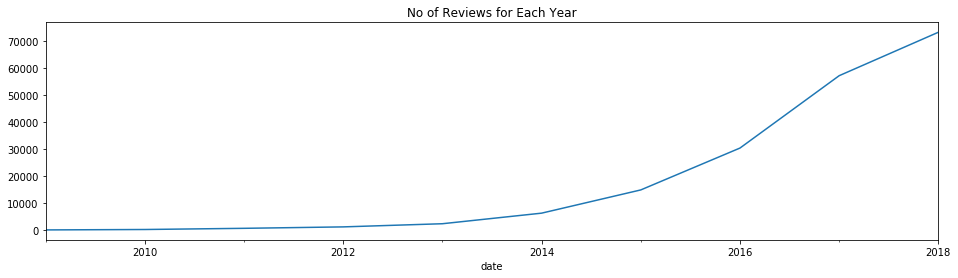

In [302]:
fig, ax = plt.subplots()
Resample2.plot(title='No of Reviews for Each Year', figsize=(16,4))

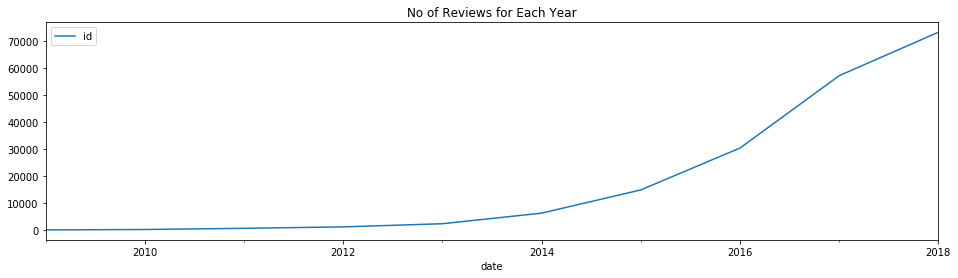

# Part 4: Calendar timeseries

### 42.Read in calendar.csv file and use the listing_id column as index. Also, use the parse_dates parameter to make the date column as Timestamp data type. Save the DataFrame as calendar.

In [303]:
calendar = pd.read_csv('calendar.csv', index_col='listing_id', parse_dates=['date'])
calendar.head()

/Users/abidemiolaoye/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,date,available,price
listing_id,,,
9273,2019-07-27,t,$225.00
9273,2019-07-26,t,$225.00
9273,2019-07-25,t,$225.00
9273,2019-07-24,t,$225.00
9273,2019-07-23,t,$225.00


,date,available,price
listing_id,,,
9273,2019-07-27,t,$225.00
9273,2019-07-26,t,$225.00
9273,2019-07-25,t,$225.00
9273,2019-07-24,t,$225.00
9273,2019-07-23,t,$225.00


In [304]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2195110 entries, 9273 to 29122035
Data columns (total 3 columns):
date         datetime64[ns]
available    object
price        object
dtypes: datetime64[ns](1), object(2)
memory usage: 67.0+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2195110 entries, 9273 to 29122035
Data columns (total 3 columns):
date         datetime64[ns]
available    object
price        object
dtypes: datetime64[ns](1), object(2)
memory usage: 67.0+ MB


### 43. Convert the 'available' column to a dummy column. That is, change the boolean string to an integer of 1 or 0.

In [169]:
#calendar['available'].astype('str').head()

In [171]:
#def dummy(table):
    #if 't' in table:
      #   return 1
    #elif 'f' in table:
      #  return 0

In [172]:
#calendar['available']=calendar['available'].apply(dummy)
#calendar

In [175]:
calendar

,date,available,price
listing_id,,,
9273,2019-07-27,t,$225.00
9273,2019-07-26,t,$225.00
9273,2019-07-25,t,$225.00
9273,2019-07-24,t,$225.00
9273,2019-07-23,t,$225.00
...,...,...,...
29122035,2018-10-15,f,NaN
29122035,2018-10-14,f,NaN
29122035,2018-10-13,f,NaN


In [180]:
#calendar['available']=calendar['available'].str.replace('t',1,inplace=True).str.replace('f',0, inplace=True)
#calendar.head() 

In [305]:
calendar['available']=calendar['available'].replace('t',1).replace('f',0)
calendar['price']=calendar['price'].str.replace("$", "").str.replace(",","").astype('float')
calendar.head()

,date,available,price
listing_id,,,
9273,2019-07-27,1,225.0
9273,2019-07-26,1,225.0
9273,2019-07-25,1,225.0
9273,2019-07-24,1,225.0
9273,2019-07-23,1,225.0


,date,available,price
listing_id,,,
9273,2019-07-27,1,225.0
9273,2019-07-26,1,225.0
9273,2019-07-25,1,225.0
9273,2019-07-24,1,225.0
9273,2019-07-23,1,225.0


### 44. Find available days for each listing by using the groupby method. 

In [306]:
calendar.groupby(['listing_id']).agg({'available':'sum'}).head()

,available
listing_id,
3781,52
5506,324
6695,321
6976,114
8789,53


,available
listing_id,
3781,52
5506,324
6695,321
6976,114
8789,53


### 45. By using the resample method,  show availability for each month. 

In [307]:
available_days = calendar.set_index('date')
Resample3=available_days.resample('M').agg({'available': 'sum'})
Resample3

,available
date,
2018-10-31,28820
2018-11-30,80910
2018-12-31,105487
2019-01-31,98282
2019-02-28,85359
2019-03-31,92978
2019-04-30,73366
2019-05-31,72079
2019-06-30,63275


,available
date,
2018-10-31,28820
2018-11-30,80910
2018-12-31,105487
2019-01-31,98282
2019-02-28,85359
2019-03-31,92978
2019-04-30,73366
2019-05-31,72079
2019-06-30,63275


### 46. By using the plot method, create a line plot of the number of availability for each month.

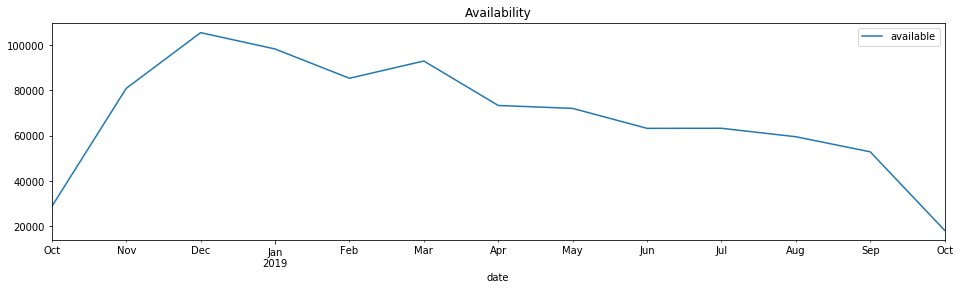

In [308]:
Resample3.plot(title='Availability', figsize=(16,4))

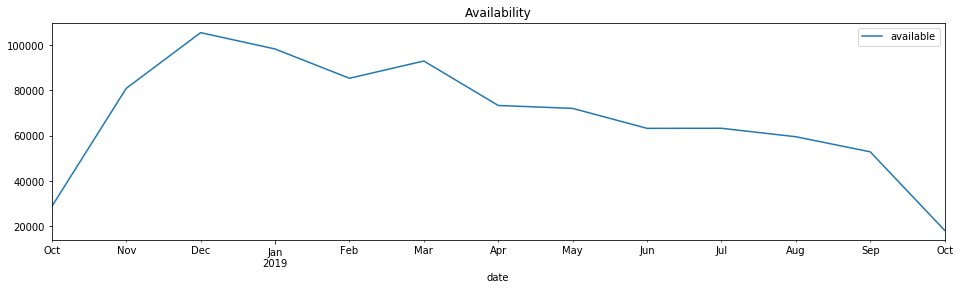

### 47. What is the average monthly price from the Calendar data?

,price
date,
2018-10-31,254.415545
2018-11-30,214.078841
2018-12-31,182.775555
2019-01-31,170.176085
2019-02-28,180.509495
2019-03-31,203.563542
2019-04-30,252.672696
2019-05-31,285.855977
2019-06-30,249.782758


In [309]:
cal_avg_price = available_days.resample('M').agg({'price': 'mean'})
cal_avg_price

,price
date,
2018-10-31,254.415545
2018-11-30,214.078841
2018-12-31,182.775555
2019-01-31,170.176085
2019-02-28,180.509495
2019-03-31,203.563542
2019-04-30,252.672696
2019-05-31,285.855977
2019-06-30,249.782758


### 48. Visually display the average price per month with a bar chart.

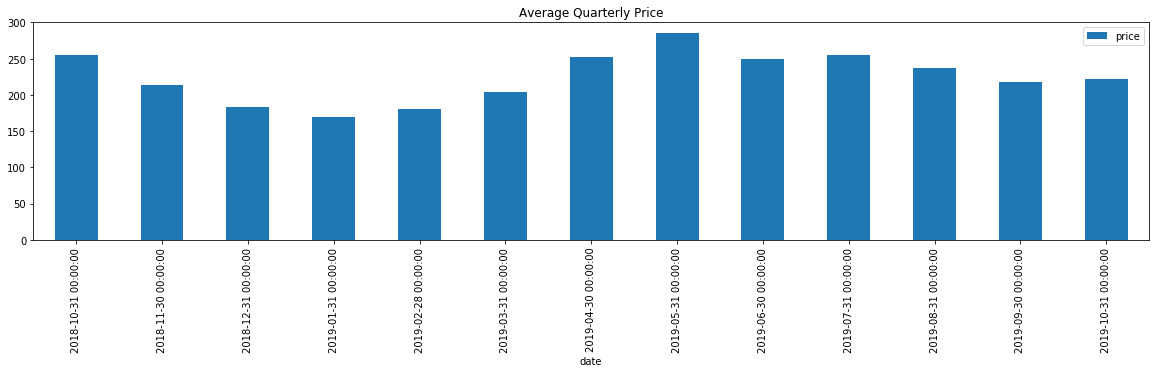

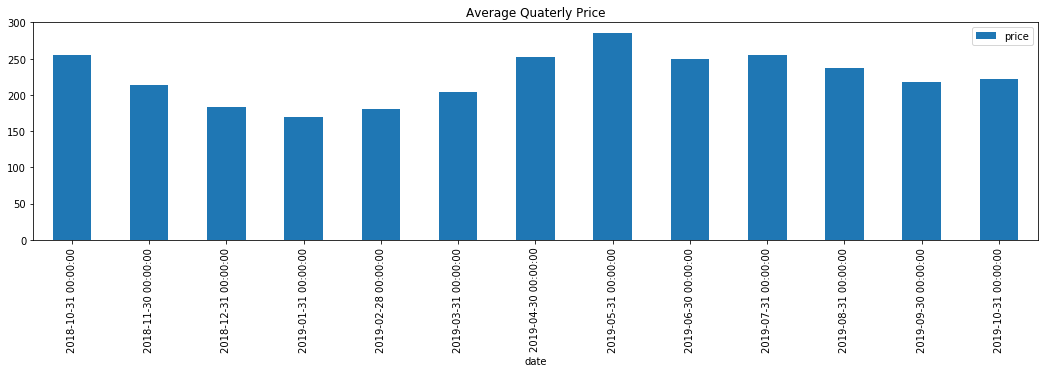

In [310]:
cal_avg_price.plot(kind='bar' , figsize=(18,4), title='Average Quaterly Price');

### 49-51. Create three questions that you like to examine along with the answers.  Each question accounts for two points. To get full points, your questions and answers should be complete. Also, they are relevant, useful, and meaningful to stakeholders.  

### 49. How many people can most listings accomodate?
###### Here we can see that listings are often posted to accomodate at most 2 people. We can assume that couples, siblings or pairs in general have an advantage here. Foll0wed by 4 which accommodates groups.

In [312]:
listings['accommodates'].value_counts()

2     2254
4     1065
3      720
1      637
5      538
6      395
8      168
7       95
10      41
9       25
12      24
16      22
14      13
11       8
13       5
15       4
Name: accommodates, dtype: int64

### 50. What assumption can be made from the Question above?
###### Here we see that homes that accommodate 2 with only one bed are listeded more often, therefore it will be approprite to assume that most bookings will be made mostly by couples. This could also explain why Bed and Breakfast's with "private rooms" are booked more often and generate the highest revenue, as in numbers 31 and 32. Therefore, advertisements can be geared towards married couples or people in relationships.

In [334]:
accommodates_table=listings.groupby(['accommodates','beds']).agg({'accommodates':'count'})
accommodates_table.columns=[['No of Listings']]
accommodates_table

pd.set_option('display.max_rows', accommodates_table.shape[0]+1)
accommodates_table

No of Listings
accommodates beds               
1            1.0             619
             2.0              10
             3.0               1
             4.0               4
             7.0               1
2            1.0            2089
             2.0             160
             3.0               1
             4.0               2
3            1.0             331
             2.0             363
             3.0              23
             4.0               3
4            1.0             164
             2.0             739
             3.0             129
             4.0              30
             5.0               2
             6.0               1
5            1.0              37
             2.0             144
             3.0             313
             4.0              39
             5.0               5
6            1.0               3
             2.0              74
             3.0             245
             4.0              62
             5.0              10
             6.0               1
7            1.0               4
             2.0               2
             3.0              25
             4.0              45
             5.0              16
             6.0               2
             7.0               1
8            2.0               8
             3.0              37
             4.0              79
             5.0              30
             6.0              12
             7.0               2
9            2.0               1
             3.0               1
             4.0               5
             5.0              13
             6.0               3
             7.0               2
10           3.0               3
             4.0               3
             5.0              14
             6.0              10
             7.0               6
             8.0               1
             9.0               2
             10.0              1
             16.0              1
11           5.0               1
             6.0               3
             7.0               1
             8.0               3
12           1.0               1
             3.0               1
             4.0               4
             5.0               4
             6.0               9
             7.0               3
             8.0               2
13           6.0               1
             7.0               1
             8.0               2
             9.0               1
14           6.0               1
             7.0               3
             8.0               3
             9.0               1
             10.0              4
             11.0              1
15           7.0               1
             9.0               1
             10.0              1
             11.0              1
16           1.0               1
             6.0               2
             8.0               2
             9.0               3
             10.0              3
             11.0              2
             12.0              3
             13.0              2
             16.0              2
             17.0              2

In [335]:
accommodates_graph = listings.groupby(['accommodates',]).agg({'accommodates':'count'})
accommodates_graph.columns=[['No of Listings']]

accommodates_graph

,No of Listings
accommodates,
1,637
2,2254
3,720
4,1065
5,538
6,395
7,95
8,168
9,25


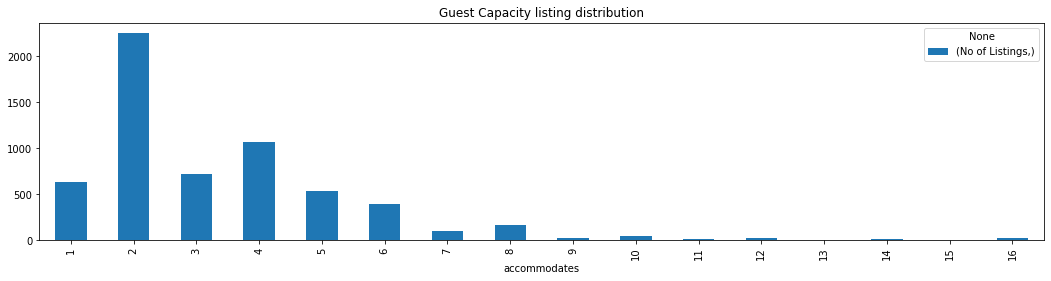

In [337]:
accommodates_graph.plot(kind='bar' , figsize=(18,4), title='Guest Capacity listing distribution');

### 51. What listings are price and time appropriate for student trips during spring break.
###### According to travel pulse, as at 2019  Americans plan to spend 1,817.70 on average on their spring break vacation, while families plan to spend a little bit more (but not too much) with an average answer of 1,996.90. We can assume that at most, half of that is spent on accommodation.

In [358]:
listings['weekly_price']=listings['weekly_price'].str.replace("$", "").str.replace(",","").astype('float')


price_weekly=listings['weekly_price'].between(0,1000)
nights=listings['maximum_nights'].between(1,7) #lENGTH OF STAY #Spring break is a week

listings[price_weekly & nights]

,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
196806,20181011131018,2018-10-11,"Comfy couch, Centrally located",Modern apartment building. Lots of light. Ful...,I live within a block of Symphony Hall and wal...,Modern apartment building. Lots of light. Ful...,none,The apartment is in close proximity to the sub...,NaN,"There are three ""T"" stations and a bus line wi...","You'll have full access to the living room, ki...",NaN,,958639,Larry,2011-08-11,"Boston, Massachusetts, United States",I'm an active and adventurous Classical musici...,within a few hours,100%,t,Fenway/Kenmore,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Boston, MA, United States",Fenway/Kenmore,Fenway,Boston,MA,02115,Boston,"Boston, MA",US,United States,42.344524,-71.086837,t,Apartment,Shared room,1,1.0,1.0,1.0,Couch,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,D...",800.0,$79.00,545.0,"$1,899.00",NaN,$25.00,1,$0.00,3,7,yesterday,t,5,20,44,314,2018-10-11,68,2011-08-22,2018-10-01,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,moderate,t,t,1,0.78
646087,20181011131018,2018-10-11,1 Bed in Charming Southie Townhouse near BCEC,One very cozy Private Bedroom in shared house....,One Bedroom available in charming and cozy tow...,One very cozy Private Bedroom in shared house....,none,Quiet neighborhood feel within close proximity...,Please consider this is my home and expect you...,"Easily accessible via the red line, commuter t...","Private Bedroom with lock, access to back deck...",I live and work from home most days so you wil...,Please be respectful of my home and treat the ...,3236611,Ingrid,2012-08-12,"Boston, Massachusetts, United States","Hi,\r\n I am a professional musician. I work a...",NaN,NaN,f,South Boston,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,"Boston, MA, United States",South Boston,South Boston,Boston,MA,02127,Boston,"Boston, MA",US,United States,42.334775,-71.049954,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1600.0,$155.00,800.0,"$3,000.00","$1,000.00",$175.00,1,$25.00,1,6,5 months ago,t,15,45,75,165,2018-10-11,4,2016-06-18,2018-06-08,100.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,f,f,1,0.14
3967592,20181011131018,2018-10-11,Minutes to Boston-Near Beach 71-3,3 or 5 minutes walking to Blue Line Orient Hei...,NaN,3 or 5 minutes walking to Blue Line Orient Hei...,none,NaN,Street Free Parking: Follow the posted City of...,NaN,NaN,Contact us by AirBnB mail and message system 2...,,20551003,May,2014-08-26,"Boston, Massachusetts, United States",A Chinese in USA for 30 years,within an hour,100%,f,East Boston,16,16,"['email', 'phone', 'reviews']",t,f,"波士顿, MA, United States",East Boston,East